In [1]:
# imports
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime, timedelta

In [2]:
crashes = pd.read_csv('./data/Motor_Vehicle_Collisions_-_Crashes_20241103.csv', low_memory=False)
# crashes

In [3]:
crashes_copy = crashes.copy()
crashes_copy

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131155,08/06/2024,20:39,NaN,NaN,NaN,NaN,NaN,CLEARVIEW EXPRESSWAY,35 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4746046,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2131156,08/06/2024,12:00,QUEENS,11001,NaN,NaN,NaN,JAMAICA AVENUE,LITTLE NECK PARKWAY,NaN,...,Unspecified,NaN,NaN,NaN,4746496,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2131157,07/29/2024,2:30,NaN,NaN,40.723442,-73.938990,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4746455,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
2131158,08/02/2024,15:48,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4746469,Sedan,Pick-up Truck,NaN,NaN,NaN


#### ** Processing: **
* Separate CRASH_DATE into 3 date fields, year, month day
* Find out if date is a holiday - isHoliday feature
* OneHotEncoding - borough
* 


In [4]:
cutoff_date = datetime.now() - timedelta(days=10*365)
crashes_copy['CRASH DATE'] = pd.to_datetime(crashes_copy['CRASH DATE'], format='%m/%d/%Y')

crashes_copy["CRASH_DATE"] = pd.to_datetime(crashes_copy["CRASH DATE"], format='%m/%d/%Y')
crashes_copy["CRASH_DATE_YEAR"] = crashes_copy["CRASH DATE"].dt.year
crashes_copy["CRASH_DATE_MONTH"] = crashes_copy["CRASH DATE"].dt.month
crashes_copy["CRASH_DATE_DAY"] = crashes_copy["CRASH DATE"].dt.day
filtered_crashes = crashes_copy[crashes_copy['CRASH DATE'] >= cutoff_date]

filtered_crashes.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_DATE,CRASH_DATE_YEAR,CRASH_DATE_MONTH,CRASH_DATE_DAY
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,4455765,Sedan,Sedan,NaN,NaN,NaN,2021-09-11,2021,9,11
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,4513547,Sedan,NaN,NaN,NaN,NaN,2022-03-26,2022,3,26
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29,2022,6,29
3,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,4456314,Sedan,NaN,NaN,NaN,NaN,2021-09-11,2021,9,11
4,2021-12-14,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,4486609,NaN,NaN,NaN,NaN,NaN,2021-12-14,2021,12,14


In [5]:
filtered_crashes.dropna(subset=["BOROUGH"],  inplace=True)
filtered_crashes.size

# Certain remove columns. Vehicle info in vehicle dataset, joined based on collision id
filtered_crashes.drop(["ZIP CODE","LATITUDE", "LONGITUDE", "LOCATION", "ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME", "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED", "NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED",  "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5", "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4", "CONTRIBUTING FACTOR VEHICLE 5"], axis=1, inplace=True)

print(filtered_crashes.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'CRASH_DATE',
       'CRASH_DATE_YEAR', 'CRASH_DATE_MONTH', 'CRASH_DATE_DAY'],
      dtype='object')


/tmp/ipykernel_11265/265171644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crashes.dropna(subset=["BOROUGH"],  inplace=True)
/tmp/ipykernel_11265/265171644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crashes.drop(["ZIP CODE","LATITUDE", "LONGITUDE", "LOCATION", "ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME", "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED", "NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED",  "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5", "CONTRIBUTING FACTOR VEHICLE 3", "

In [6]:
for col in filtered_crashes.columns:
    print(col)
    print(filtered_crashes[col].unique())


CRASH DATE
<DatetimeArray>
['2021-09-11 00:00:00', '2021-12-14 00:00:00', '2021-12-11 00:00:00',
 '2021-12-13 00:00:00', '2021-12-12 00:00:00', '2022-07-12 00:00:00',
 '2022-04-24 00:00:00', '2022-03-08 00:00:00', '2022-04-22 00:00:00',
 '2022-04-12 00:00:00',
 ...
 '2024-05-29 00:00:00', '2024-05-31 00:00:00', '2024-06-24 00:00:00',
 '2024-06-13 00:00:00', '2024-06-19 00:00:00', '2024-06-23 00:00:00',
 '2024-06-22 00:00:00', '2024-06-25 00:00:00', '2024-06-28 00:00:00',
 '2024-07-07 00:00:00']
Length: 3614, dtype: datetime64[ns]
CRASH TIME
['9:35' '8:13' '8:17' ... '1:44' '5:07' '3:44']
BOROUGH
['BROOKLYN' 'BRONX' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']
NUMBER OF PERSONS INJURED
[ 0.  2.  4.  1.  5.  7.  3.  6.  9. 18.  8. 10. 14. 13. 15. 11. 17. 12.
 20. nan 22. 16. 31. 19. 27. 32. 24. 23. 34. 25.]
NUMBER OF PERSONS KILLED
[ 0.  1.  2.  3. nan  8.  4.]
NUMBER OF MOTORIST INJURED
[ 0  2  4  1  5  7  3  6  9 18  8 10 14 13 15 11 17 12 20 21 16 31 19 22
 30 24 23 34 25]
NUMBER OF MOTORIST

In [7]:
# Tentative remove NAs. Possibly replace with 0
filtered_crashes.dropna(subset=["NUMBER OF PERSONS INJURED"], inplace=True)

# Tentative remove NAs.
filtered_crashes.dropna(subset=["NUMBER OF PERSONS KILLED"], inplace=True)



/tmp/ipykernel_11265/3782651999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crashes.dropna(subset=["NUMBER OF PERSONS INJURED"], inplace=True)
/tmp/ipykernel_11265/3782651999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crashes.dropna(subset=["NUMBER OF PERSONS KILLED"], inplace=True)


In [8]:
# Shows how commonly alcohol and driver inexperience are listed as contributing factores in each column
print(filtered_crashes.loc[filtered_crashes["CONTRIBUTING FACTOR VEHICLE 1"] == "Alcohol Involvement"].size)
print(filtered_crashes.loc[filtered_crashes["CONTRIBUTING FACTOR VEHICLE 2"] == "Alcohol Involvement"].size)

print(filtered_crashes.loc[filtered_crashes["CONTRIBUTING FACTOR VEHICLE 1"] == "Driver Inexperience"].size)
print(filtered_crashes.loc[filtered_crashes["CONTRIBUTING FACTOR VEHICLE 2"] == "Driver Inexperience"].size)


190428
11578
259560
47670


In [9]:
# Holidays
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2010-01-01', end='2025-12-31').to_pydatetime()

def isHoliday(row):
    return row["CRASH DATE"] in holidays

filtered_crashes["isHoliday"] = filtered_crashes.apply(isHoliday, axis=1)


/tmp/ipykernel_11265/1175022431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crashes["isHoliday"] = filtered_crashes.apply(isHoliday, axis=1)


In [10]:
print(filtered_crashes.head)


<bound method NDFrame.head of         CRASH DATE CRASH TIME    BOROUGH  NUMBER OF PERSONS INJURED  \
3       2021-09-11       9:35   BROOKLYN                        0.0   
4       2021-12-14       8:13   BROOKLYN                        0.0   
7       2021-12-14       8:17      BRONX                        2.0   
8       2021-12-14      21:10   BROOKLYN                        0.0   
9       2021-12-14      14:58  MANHATTAN                        0.0   
...            ...        ...        ...                        ...   
2131117 2024-07-19      18:00   BROOKLYN                        0.0   
2131134 2024-07-07      14:12      BRONX                        0.0   
2131144 2024-07-21      18:05   BROOKLYN                        0.0   
2131145 2024-05-12      10:34     QUEENS                        0.0   
2131156 2024-08-06      12:00     QUEENS                        0.0   

         NUMBER OF PERSONS KILLED  NUMBER OF MOTORIST INJURED  \
3                             0.0                   

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
(OneHotEncoder(sparse_output=False),
['BOROUGH']),
remainder="passthrough")
ct.set_output(transform="pandas")
encoded_crashes = ct.fit_transform(filtered_crashes)

In [12]:
encoded_crashes.rename(columns={'remainder__COLLISION_ID': 'COLLISION_ID'}, inplace=True)

#print(encoded_crashes.head)
print(encoded_crashes.columns)


Index(['onehotencoder__BOROUGH_BRONX', 'onehotencoder__BOROUGH_BROOKLYN',
       'onehotencoder__BOROUGH_MANHATTAN', 'onehotencoder__BOROUGH_QUEENS',
       'onehotencoder__BOROUGH_STATEN ISLAND', 'remainder__CRASH DATE',
       'remainder__CRASH TIME', 'remainder__NUMBER OF PERSONS INJURED',
       'remainder__NUMBER OF PERSONS KILLED',
       'remainder__NUMBER OF MOTORIST INJURED',
       'remainder__NUMBER OF MOTORIST KILLED',
       'remainder__CONTRIBUTING FACTOR VEHICLE 1',
       'remainder__CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID',
       'remainder__CRASH_DATE', 'remainder__CRASH_DATE_YEAR',
       'remainder__CRASH_DATE_MONTH', 'remainder__CRASH_DATE_DAY',
       'remainder__isHoliday'],
      dtype='object')


In [13]:
persons_df = pd.read_csv('./processed/person_processed.csv', low_memory=False)


In [14]:
persons_df.rename(columns={'remainder__COLLISION_ID': 'COLLISION_ID'}, inplace=True)
print(persons_df.columns)


Index(['onehotencoder__PERSON_INJURY_Injured',
       'onehotencoder__PERSON_INJURY_Killed',
       'onehotencoder__PERSON_INJURY_Unspecified',
       'onehotencoder__EJECTION_Does Not Apply',
       'onehotencoder__EJECTION_Ejected',
       'onehotencoder__EJECTION_Not Ejected',
       'onehotencoder__EJECTION_Partially Ejected',
       'onehotencoder__EJECTION_Trapped', 'onehotencoder__EJECTION_Unknown',
       'onehotencoder__EJECTION_nan',
       'onehotencoder__EMOTIONAL_STATUS_Apparent Death',
       'onehotencoder__EMOTIONAL_STATUS_Conscious',
       'onehotencoder__EMOTIONAL_STATUS_Does Not Apply',
       'onehotencoder__EMOTIONAL_STATUS_Incoherent',
       'onehotencoder__EMOTIONAL_STATUS_Semiconscious',
       'onehotencoder__EMOTIONAL_STATUS_Shock',
       'onehotencoder__EMOTIONAL_STATUS_Unconscious',
       'onehotencoder__EMOTIONAL_STATUS_Unknown',
       'onehotencoder__EMOTIONAL_STATUS_nan',
       'onehotencoder__BODILY_INJURY_Abdomen - Pelvis',
       'onehotencoder__

In [15]:
#merged_df = encoded_crashes.merge(persons_df, on='COLLISION_ID')

In [16]:
# Assuming persons_df is the DataFrame containing person data
# Group by 'COLLISION_ID' and count the number of people for each collision_id
persons_aggregated = persons_df.groupby('COLLISION_ID').size().reset_index(name='num_people')

# Display the first few rows of the aggregated DataFrame
#print(persons_aggregated.head())

# Filter the DataFrame where num_people is 0
multiple_people = persons_aggregated[persons_aggregated['num_people'] >= 1]

# Print the filtered DataFrame
print(multiple_people)


         COLLISION_ID  num_people
0             3405175           2
1             3405176           2
2             3405178           1
3             3405179           2
4             3405180           2
...               ...         ...
1137396       4767913           2
1137397       4767923           1
1137398       4767926           2
1137399       4767928           1
1137400       4767929           2

[1137401 rows x 2 columns]


In [17]:
# Join crashes and people on collision id
merged_df = encoded_crashes.merge(multiple_people, on='COLLISION_ID', how='left')

# Set NA values in num_people with 0 (if there are any collisions without people data)
merged_df.dropna(subset=['num_people'], inplace=True)

# Display the first few rows to verify the change
print(merged_df.head())


   onehotencoder__BOROUGH_BRONX  onehotencoder__BOROUGH_BROOKLYN  \
2                           1.0                              0.0   
4                           0.0                              0.0   
5                           0.0                              0.0   
6                           0.0                              0.0   
7                           0.0                              1.0   

   onehotencoder__BOROUGH_MANHATTAN  onehotencoder__BOROUGH_QUEENS  \
2                               0.0                            0.0   
4                               1.0                            0.0   
5                               0.0                            1.0   
6                               0.0                            1.0   
7                               0.0                            0.0   

   onehotencoder__BOROUGH_STATEN ISLAND remainder__CRASH DATE  \
2                                   0.0            2021-12-14   
4                                   0.0 

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming merged_df is already defined and cleaned

# Select features for clustering (excluding non-numeric columns if any)
features = merged_df.select_dtypes(include=[float, int])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # You can change the number of clusters
merged_df['cluster'] = kmeans.fit_predict(features)

# Display the first few rows to verify the clustering
print(merged_df.head())

# Plot the clusters (if there are 2 features for simplicity)
if features.shape[1] == 2:
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=merged_df['cluster'], cmap='viridis')
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])
    plt.title('K-means Clustering')
    plt.show()

   onehotencoder__BOROUGH_BRONX  onehotencoder__BOROUGH_BROOKLYN  \
2                           1.0                              0.0   
4                           0.0                              0.0   
5                           0.0                              0.0   
6                           0.0                              0.0   
7                           0.0                              1.0   

   onehotencoder__BOROUGH_MANHATTAN  onehotencoder__BOROUGH_QUEENS  \
2                               0.0                            0.0   
4                               1.0                            0.0   
5                               0.0                            1.0   
6                               0.0                            1.0   
7                               0.0                            0.0   

   onehotencoder__BOROUGH_STATEN ISLAND remainder__CRASH DATE  \
2                                   0.0            2021-12-14   
4                                   0.0 

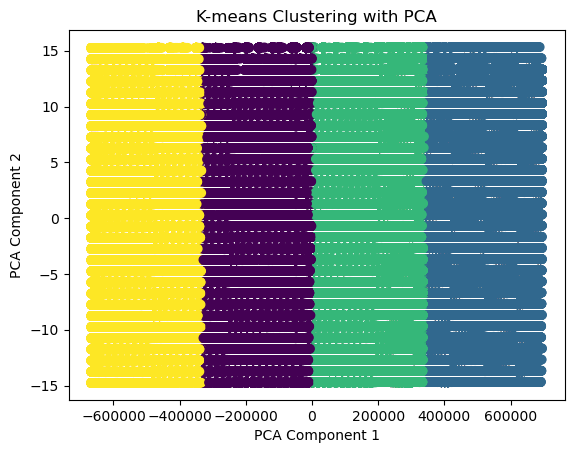

In [23]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=merged_df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with PCA')
plt.show()

In [20]:
# Print the number of records in merged_df
print(f"Number of records in merged_df: {len(merged_df)}")

Number of records in merged_df: 705697
